In this lecture, we begin our journey of understanding deep learning. Artificial neural networks (ANNs) have a lot of application in not just traditional supervised learning topics such as credit default prediction, but also in many advanced frontiers such as object detection, **localization** (one is given a list of object categories and has to predict their locations), **semantic segmentation** (one tries to label each pixel of an image as belonging to an object category). In this lecture, we lay down the ground work of ANN and discuss how we can build an ANN model from a theoretic standpoint. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import os
import autograd

import autograd.numpy as anp # importing thinly-wrapped numpy
import autograd.numpy.random as npr # for convenient access to numpy.random
from autograd import grad  

In [2]:
#path="C:\\Users\\gao\\GAO_Jupyter_Notebook\\Datasets"
#os.chdir(path)

path="C:\\Users\\pgao\\Documents\\PGZ Documents\\Programming Workshop\\PYTHON\\Open Courses on Python\\Udemy Course on Python\Introduction to Data Science Using Python\\datasets"
os.chdir(path)

### I. Basic Topology of ANN 

ANN is modeled after the human brain. The **neuron** is the basic unit of processing in the brain. It has a broad, branching tree of **dendrites**, which receive chemical signals from other neurons at junctions called **synapses**, and convert these into electrical signals. To be more precise, the cell body (soma) of a typical neuron contains its nucleaus and two types of processes (or projections): dendrites and **axons**. The neuron receives signals from other neurons via its many dendrites, which operate as input devices. Each neuron has a single axon, along fiber that operates as an output device. The end of the axon branches into strands, and each strand terminates in a synapse. Each synapse may either connect to a synapse on a dendrite or the cell body of another neuron or terminate into muscle tissue. 

Neurons send signals to each other via an electro-chemical process. All neurons are electrically charged due to ion concentrations inside and outside the cell. Under appropriate conditions, an activated neuron fires an electrical pulse (called **action potential**, or **spike**) of fixed amplitude and duration. The action potential travels down the axon to its endings. Each ending is then swollen to form a **synaptic knob**, in which neurotransmitters (called glutamic acid) are stored. In short, the dendrites integrate these electrical signals in this complex, nonlinear ways, and if the combined signal is strong enough, the neuron generates an action potential. This is an electrical signal that's propagated down the neuron's axon, which eventually causes the neuron to release chemical signals at its synapses with other neurons. Those neurons then integrate their incoming signals, and so on.

In general, firing of the signal tends to occur randomly on a cursory look, but the actual rate of firing depends on many factors. One of those factors is the status of the total input signal. This is derived from the relative strengths of the two types of synapses, namely the **inhibitory synapses** which prevent the neurons from firing, and the **excitatory synapses**, which push the neuron close to firing. Depending on whether or not the total input signal receives at the synapses of a neuron exceeds some threshod limit (some people call it 'gate value'), the neuron may fire, be in a resting state, or be in a electircally neutral state. 

In machine learning, we abstract away nearly all of this complexity, and use a simplified version of the neural transmission model. In this neuron-based model, one particular neuron has a set of incoming connections from other neurons, each with an associated strength, or **weight**. It computes a value, called the **pre-activation**, which is the sum of the incoming signals times their weights $z=\sum_{k}w_{k}x_{k}+b$ (where $k=1,2,...K$ denotes the index of the input space). Below is a visual illustration of how one neuron acts:

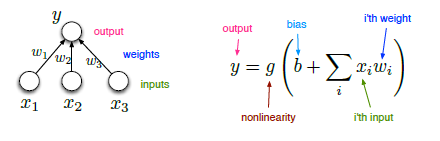

In [3]:
from IPython.display import Image
Image("simplified neuron model.PNG", width=300, height=300)

Here $x$ denotes inputs and $y$ denotes output as usual. The function $g(.)$ is some nonlinear function. The scalar value $b$, called a **bias (term)**, determines the neuron's activation in the absence of inputs. The pre-activation is passed through a nonlinearity function, called an **activation function** $g(.)$, to compute the activation $a = g(z)$. Common activation functions includes the sigmoid function, softmax function, folding activation function (extensively used in the pooling layers in convolutional neural networks, and in output layers of multiclass classification networks), or heaveside activation function etc.. There are many we can list, but we won't elaborate on the details for now. Neural networks are collections of thousands (or millions) of these simple processing units that together perform useful computations. For now, we'll concern ourselves with **feed-forward neural networks**, where the units are arranged into a graph without any cycles, so that all the computation can be done sequentially. This is in contrast with **recurrent neural networks**, where the graph have cycles, so the processing can feed into itself.

The foundational feed-forward network model is called a **multilayer perceptron model (MLP)**, as shown below. Here, the units are arranged into a set of **layers**, and each layer contains some number of identical units. Every unit in one layer is connected to every unit in the next layer, that is to say, we are dealing with a **fully connected network** (we can essentially treat a **partial connected network** as a special case of a fully connected network by setting the corresponding weight to 0). The first layer is the **input layer**, and its units take the values of the input features. The last layer is the **output layer**, and it has one unit for each value the network outputs (i.e. a single unit in the case of regression or binary classification, or $R$ units in the case of $R$-class classification). All the layers in between these are known as **hidden layers**. The units in these layers are known as **input units**, **output units**, and **hidden units**, respectively. The number of layers is known as the **(network) depth**, and the number of units in a layer is known as the **(network) width**. Multilayer feed-forward neural nets with nonlinear activation functions are **universal approximators**: they can approximate any function arbitrarily well. The hard part is finding the optimal weight and the network topology to make the best prediction. 

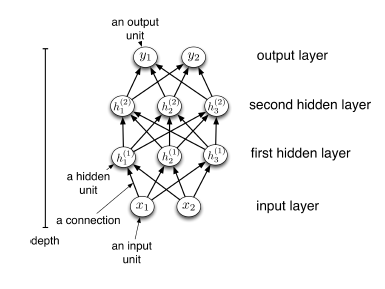

In [4]:
from IPython.display import Image
Image("MLP.PNG", width=300, height=300)

Before we proceed, to understand ANN, we need to pause and rewind a bit to go over a short history of ANNs so that we can appreciate the motivation and core of the problem on a deeper level. The earliest neural theory from a computation perspective can be traced back to McCulloch-Pitts model. Their model consists of a single neuron with $K$ inputs $x_{1},x_{2},...x_{K}$ and a binary output $y$ with a threshold $\mathscr{g}$ (scripted letter 'g' for 'gate value', which we will explain). The multiple inputs are essentially dendrites and a single output is essentially the axon. The inputs are all binary as well so that $x_{k}=\{0,1\} \forall k$ (you can think of these actions as 'on' and 'off'). The signal at each input connection depends on whether the synapse in question is excitatory or inhibitory. If any one of the synapse is inhibitory, the neuron is prevented from firing (that is, the output is 0). If no inhibitory synpase is present, the inputs are summed to produce the total excitation equal to $\sum_{k=1}^{K}x_{k}$, and then this value is compared with a threshold gate value $\mathscr{g}$. If the realized value of $\sum_{k=1}^{K}x_{k} \ge \mathscr{g}$, then the output is 1 and the neuron fires. Otherwise, the output is 0 and the neuron does not fire. The McCulloch-Pitts neuron model is sometimes referred to as a threshold logic unit (TLU) as it can be used to define simple logical functions of $K$ arguments where $y=1$ means 'TRUE' and $y=0$ denotes 'FALSE'. 

Although the TLU type of model can be used to express basic logical functions, the problem is that it cannot universally mimic other complicated nonlinear functions. So it is still of limited use. This is where the Hebbian learning theory comes into play. Donald Hebb in 1949 pointed out that the strengh of a synaptic connection between two neurons depends on their associated firing history: the more often the two neurons fire together, the stronger their connection. The theory was later expanded in 1957 by adding the following rule of neural inhibitions: if neuron A repeated or persistently sends signals to neuron B, but B does not fire, this reduces the chance that future signals from A will entice B to fire. This type of inhibitory rule is necessary because otherwise the system of synaptic connections throughout the cerebral cortext would grow without limit as soon as one such connection is activated. This idea, as we will see, is in essence manifested through the something called backpropagation. But at that time, the general conconsensus is that we need to add some type of 'weight' vector into the system so that we can account for this type of 'inhibitory rule' in a more flexible way. This prompted a psychologist named Frank Rosenblatt to construct a minimally constrained system called perceptron. The main improvement here is that there will be weights associated with each input so that we have some rule rule determined by formulae like this: $\sum_{k=1}^{K}w_{k}x_{k}$. Positive weights reflect excitatory synapses and negative weights reflect inhibitory synapse. The magnitude of a weight shows the strengh of the connection. Learning can essentially be understood as updating the weights to some optimal sense. A neural network can thus be constructed using perceptrons as its foundations through a directed acyclic graph (a **graph** is a set of **vertices**, or **nodes**, connected through a set of **edges**). In a **directed graph**, the edges are assigned an orientation so that numerical information flows along each edge in a particular direction. In a feed-foward network, information flows in one direction only. An **acyclic graph** is one in which no loops or feedback are allowed. 

Rosenblatt's model is an improvement but it has limitations. One big limitation is that it depends on the assumption that those two binary classes are linearly separable. When this assumption is violated, the algorithm will not terminate (see Izenman 2008 for more information). This finally motivates the multilayer pereptron model (MLP). In this model, we stack single-unit perceptron models together to form a network of nodes, each one fully connected. To describe this model, we let $l=1,2,...L$ (non-scripted in font) be the index of the number of layers in a neural net. Let $x$ be a $K$-dimensional vector so that we have $K$ inputs. So $z_{l,h}$ denotes the $h$th neuron in the $l$th layer of the ANN. Within each layer $l$, we assume there are $H_{l}$ neurons, and thus the total number of neurons in the model is $H=\sum_{l=1}^{L}H_{l}$. We assume we have $R$ output nodes so we have $y_{1}, y_{2}, ...y_{r}, ...y_{R}$. This will cover the multiclass classification type of problems. 

For illustrative purpose, and to make the notation simplified, suppose we have a single hidden layer and we want to set up a population model that predicts the target variable so that $y=m(x|w)+\epsilon$. This means $L=1$, $H_{1}=H$ and we have $R$ output nodes for each $y_{r}$. Because we have two-layers (i.e. one hidden layer), let's partition all the weights so that $w=(\beta, \alpha)$ where $\beta_{kh}$ is the weight of the connection between $x_{k}$ and $z_{h}$ and $\alpha_{hr}$ is the weight of the connection between $z_{h}$ and $y_{r}$. Let the weights absorb the bias terms at each layer without loss of generality. Now define $x=(x_{1}, x_{2}, ...x_{K})$, $y=(y_{1}, y_{2}, ...x_{R})$, $z=(z_{1}, z_{2}, ...z_{H})$. Let $\beta_{h}=(\beta_{1h}, \beta_{2h}, ...\beta_{Kh})$ and $\alpha_{r}=(\alpha_{1r}, \alpha_{2r}, ...\alpha_{Hr})$. Let $\sigma_{h}(.),g_{h}(.)$ be the corresponding activation functions for the hidden and output layers of nodes respectively. Now let's define the following:

   - $u_{h}=x'\beta_{h}$ and $z_{h}=\sigma_{h}(u_{h})$ 
   - $v_{r}=z'\alpha_{r}$
   - $m_{r}(x)=g_{r}(v_{r})$
   
We see that essentially, this is an exercise of functional composition:

   - $y_{r}=g_{r}(\sum_{h=1}^{H}\alpha_{hr}\sigma_{h}(\sum_{k=1}^{K}\beta_{kh}x_{k}))+\epsilon_{r}$.
   
In matrix form, we can rewrite the above as:

   - $y=g(A\sigma(Bx))+\epsilon$
   
Here, $B=(\beta_{hk})$ is a $(H \times K)$ matrix of weights between the input nodes and hidden layers, and $A=(\alpha_{rh})$ is a $(R \times H)$ matrix of weights between the hidden layer and the output layer. Also $\sigma=(\sigma_{1},...\sigma_{H})'$, $g=(g_{1},...g_{R})'$ are vector-valued nonlinear activation functions. 

Models with more than one hidden layers can be written down in a similar fashion. We will omit the details here to avoid messy notations. 

### II. Backpropagation and Gradient Descent

We have set up the ANN structure. Now the question is learning, i.e., how do we update the weights?

To begin with, let's define a few terms. Recall that a loss function tells us how far off the prediction is from the target. Let $i=1,2,...n$ be the index of the observations as usual. We will use $\mathscr{l}(.)$ denote a loss function. The cost function is simply the loss averaged over all the training examples such that $\mathscr{c}(t)=\frac{1}{n}\sum_{i=1}^{n}(y_{i}-t_{i})^{2}$. The idea is that we are trying to minimize a cost function with respect to the model parameters. For example, for linear models, the loss function is the **squared loss** defined as $\mathscr{l}(y,t)=\frac{1}{2}(y-t)^{2}$. Another famous loss function is the **cross-entropy loss function** defined as $\mathscr{l}(y,t)=I_{[t=1]}(-log(y))+I_{[t=0]}(-log(1-y))$, where $I_{[.]}$ is the characteristic function. Another common loss function is the **hinge loss**. Here, $y$ is a real value, and $t \in \{-1,1\}$: $\mathscr{l}(y,t)=max\{0, 1-ty\}$. For example, a linear model with hinge loss is known as a support vector machine (SVM).

To fit an ANN model, we denote the complete the set of weight by $w=(\alpha, \beta)$. For regression, we use the sum-of-squared errors as our cost function so that $\mathscr{c}(w)=\sum_{i=1}^{n}\sum_{r=1}^{R}(y_{ir}-m_{r}(x_{i}))^{2}$. For classification erros, we use cross-entropy function as our criteria (deviance): $\mathscr{c}(w)=-\sum_{i=1}^{n}\sum_{r=1}^{R}y_{ir}log(m_{r}(x_{i}))$. Typically, we don't want the global minimizer of the cost, as this is likely going to overfit the model. INstead. some regularization is needed: this is achieved through a penalty term, or indirectly by early stopping. We will ignore it for now. And to simplify the problem, we will focus on the regression case using the squared loss. 

The generic approach to minimize the cost is by **gradient descent**. In this particular context, the algorithm is called **backpropagation** (BP). The gradient can be easily derived using the chain rule for differentiation. Here comes the detail. Let $z_{hi}=\sigma(\beta_{h}'x_{i})$ and let $z_{i}=(z_{1i},z_{2i},...z_{hi},...z_{Hi})$. Let the objective function be $\mathscr{c}(w)=\sum_{i=1}^{n}\sum_{r=1}^{R}(y_{ir}-m_{r}(x_{i}))^{2}$. Taking partial derivatives with $\alpha$'s and $\beta$'s yield:

  - $\frac{\partial \mathscr{c}_{i}}{\partial \alpha_{rh}}=-2(y_{ir}-m_{r}(x_{i}))g_{r}'(\alpha_{r}'z_{i})z_{hi}$.
  - $\frac{\partial \mathscr{c}_{i}}{\partial \beta_{hk}}=-\sum_{r=1}^{R}2(y_{ir}-m_{r}(x_{i}))g_{r}'(\alpha_{r}'z_{i})\alpha_{rh}\sigma'(\alpha_{h}'x_{i})x_{ik}$.
  
Given these derivatives, we can apply the gradient descent with the learning rate $\gamma$ at each step $s$:

  - $\alpha_{rh}^{(s+1)}=\alpha_{rh}^{(s)}-\gamma \sum_{i=1}^{n}\frac{\partial \mathscr{c}_{i}}{\partial \alpha_{rh}^{(s)}}$ (GD1)
  - $\beta_{hk}^{(s+1)}=\beta_{hk}^{(s)}-\gamma \sum_{i=1}^{n}\frac{\partial \mathscr{c}_{i}}{\partial \beta_{hk}^{(s)}}$ (GD2)
  
Now let's write the two partial derivatives equation as:

  - $\frac{\partial \mathscr{c}_{i}}{\partial \alpha_{rh}}=\delta_{ri}z_{hi}$ (EQ1)
  - $\frac{\partial \mathscr{c}_{i}}{\partial \beta_{hk}}=\pi_{hi}x_{ik}$ (EQ2)
  
The quantities $\delta_{ri}$ and $\pi_{hi}$ are 'errors' from the current model at the output and hidden layer units. From defnitions, these errors satisfy the following equation known as the backpropagation equation:

  - $\pi_{hi}=\sigma'(\beta_{h}'x_{i})\sum_{r=1}^{R}\alpha_{rh}\delta_{ri}$.
  
Using this, the gradient descent can be implemneted with a two-pass algorithm with the starting values of weights near 0 (because if the weights are near zero, then the operative part of hte sigmoid is roughly linear, and hence the neural network collapses into an approximately linear model):

  1. In the forward pass, the current weights are fed and predicted values of the target are computed from the backpropagation equation. 
  2. In the backward pass, the errors $\delta_{ri}$ are computed, and then back-propagated via the backpropagation equation to give the errors $\pi_{hi}$. Both sets of the errors are then used to compute the gradients for the updates in (GD1)(GD2) via (EQ1)(EQ2).
  
A good explanation of backpropagation can be found in Hastie, T., Hastie, T., Tibshirani, R., & Friedman, J. H. (2001) chapter 10. The idea is that we initialize the value of weights first, and then go forward with the direction of the network in the forward-pass stage, so that we can get the prediction. And then we go backward to update the gradients and the weights. 

### III. Automatic Differentiation Using Autograd

When it comes to ANN, the most mysterious part is backpropagation and gradient descent. Specifically, the technical mystery is how computers handle chain rules and differentiation. For most of the discussions, we are certainly simplifying the problem above by assuming the function to be differentiated is a scalar-valued multivariate function. A more general case is when the function to be differentiated is a vector-valued function. In that case, the derivatives will be stored in a matrix called Jacobian. We have encountered the use of Jacobian in our multivariate calculus class when we study change of variables.

In computer science, there are three approaches to differentiation:

   1. **Symbolic differentiation**: symbolic differentiatoin is the method of automatic manipulation of mathematical expressions to get derivatives. It takes a math expression and returns a math expression. An example would be that if $f(x)=x^{2}$, then we code $\frac{df(x)}{dx}=2x$. Programs in Mathematica, Maple use this type of differentiation. In general, symbolic mathematics programs manipulate formulas to produce new formulas, rather than performing numeric calculations based on formulas. Symbolic differentiation can lead to inefficient code and faces the difficulty of converting a computer program into a single expression.
   2. **Numeric differentiation**: this is what we encounter in numerical analysis. The algorithm approximates derivatives by finite differences s.t. $\frac{\partial f(x)}{\partial x_{k}}=lim_{h \rightarrow 0}\frac{f(x_{1},...x_{k}+h,...x_{K})-f(x_{1},...x_{k}-h,...x_{K})}{2h}$, where $x$ is a $K$-dimensional vector. 
   3. **Automatic differentiation**: this is the most advanced way of differentiation. It takes code that computes a function and returns code that computes the derivative of that function. The goal isn't to obtain closed-form solutions, but to be able to wirte a program that efficiently computes the derivatives. This type of algorithm is often used in deep learning packages such as PyTorch or TensorFlow. 

Both symbolic and numerical differentiation can introduce round-off errors in the discretization process and cancellation. Both classical methods have problems with calculating higher derivatives, where complexity and errors increase. Finally, both classical methods are slow at computing partial derivatives of a function with respect to many inputs, as is needed for gradient-based optimization algorithms. Automatic differentiation solves all of these problems. A good source to understand automatic differentiatin can be found in this course website: http://www.cs.toronto.edu/~rgrosse/courses/csc321_2018/. 

We are going to discuss more on this topic when we study TensorFlow. But for now, we will use a package called 'Autograd' (which needs to be installed through pip, and the instruction is here: https://anaconda.org/conda-forge/autograd) to perform automatic differentiation. The idea from 'Autograd' is the same as the ones in TensorFlow and PyTorch. The actual algorithm certainly has some small differences. But we now only focus on the idea through some examples:

   - Autograd can automatically differentiate native Python and Numpy code.
   - It can handle a large subset of Python's features, including loops, conditional statements (if/else), recursion and closures.
   - It can also compute higher-order derivatives.
   - It uses reverse-mode differentiation (backpropagation) so it can efficiently take gradients of scalar-valued functions with respect to array-valued arguments.
   
Let's see some examples. The main function we will be using is the grad() function from the 'AutoGrad' package:

In [5]:
def tanh(x): # defining a hyperbolic tangent function
    y = anp.exp(-x)
    return (1.0 - y) / (1.0 + y)

grad_tanh = grad(tanh) # creating a 'function' that computes the gradient of tanh

print(grad_tanh(1.0)) # evaluating the gradient at x = 1.0
print((tanh(1.0001)-tanh(0.9999))/0.0002) # comparing to numeric gradient computed using finite differences


0.39322386648296376
0.39322386636453377


The function grad(_fun_, _argnum_=0) returns a function which computes the gradient of _fun_ argument with respect to positional argument number _argnum_. The returned function takes the same arguments as _fun_, but returns the gradient instead. The function _fun_ should be scalar-valued. The gradient has the same type as the argument.

To understand what's going on, let's see an example with which we will see how a complicated computation can be written as a composition of simpler functions through the chain rule. Say we want to write a function to compute the gradient of the sigmoid function: $\sigma(x)=\frac{1}{1+e^{-x}}$. We can write $\sigma(x)$ as a composition of several elementary functions, as $\sigma(x)=s(c(b(a(x))))$, where $a(x)=-x$, $b(a)=e^{a}$, $c(b)=1+b$, and $s(c)=\frac{1}{c}$. Here, we have "staged" the computation such that it contains several intermediate variables, each of which are basic expressions for which we can easily compute the local gradients. The grad() essentially builds a tape that records all of these operations from a conceptual perspective, and then we will compute $\frac{\partial \sigma}{\partial x}=\frac{\partial s}{\partial c}\frac{\partial c}{\partial b}\frac{\partial b}{\partial a}\frac{\partial a}{\partial x}$. Below, let's compare the results between grad() and differentiating manually. 

In [6]:
def grad_manual(x):
    """Implements the gradient of the logistic sigmoid function 
    $\sigma(x) = 1 / (1 + e^{-x})$ using staged computation
    """
    # Forward pass: keeping track of intermediate values for use in the 
    a = -x         # -x in denominator
    b = anp.exp(a)  # e^{-x} in denominator
    c = 1 + b      # 1 + e^{-x} in denominator
    s = 1.0 / c    # Final result, 1.0 / (1 + e^{-x})
    
    # Backward pass
    dsdc = (-1.0 / (c**2))
    dsdb = dsdc * 1
    dsda = dsdb * anp.exp(a)
    dsdx = dsda * (-1)
    
    return dsdx


def sigmoid(x):
    y = 1.0 / (1.0 + anp.exp(-x))
    return y

grad_automatic = grad(sigmoid)

print(grad_automatic(2.0))
print(grad_manual(2.0))

0.1049935854035065
0.1049935854035065


Now let's see an example using the 'Autograd' package to compute a linear regression problem where $y=wx+b$. We choose the squared loss function with cost function $\mathscr{c}(t)=\frac{1}{n}\sum_{i=1}^{n}(y_{i}-t_{i})^{2}=\frac{1}{n}\sum_{i=1}^{n}(wx_{i}+b-t_{i})^{2}$. 

We generate a synthetic dataset ${(x_{i},t_{i})}$ by first taking the $x_{i}$ to be linearly spaced in the range $[0,10]$ and generating the corresponding value of $t_{i}$ using the following equation (where $w=4, b=10$): $t_{i}=4x_{i}+10+e_{i}$. We assume the stochastic error term is drawn from a normal distribution $e_{i} \sim N(0,2)$. We select the sample size $n=100$.

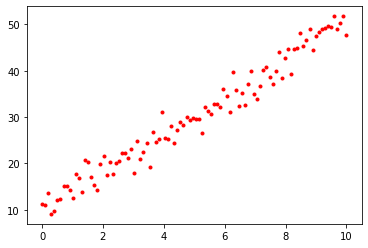

In [7]:
n = 100 # number of training data points
x = np.linspace(0, 10, n)
t = 4 * x + 10 + npr.normal(0, 2, x.shape[0])
plt.plot(x, t, 'r.')

{'w': 4.014479288139772, 'b': 10.170347919976749}


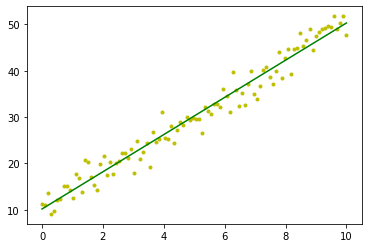

In [8]:
w = npr.normal(0, 1) # initializing random parameters
b = npr.normal(0, 1) # initializing random parameters
params = { 'w': w, 'b': b } # aggregating parameters in a dictionary

def cost(params):
    y = params['w'] * x + params['b']
    return (1 / n) * anp.sum(0.5 * anp.square(y - t))

grad_cost = grad(cost) # finding the gradient of the cost function using Autograd

num_epochs = 5000  # number of epochs of training
gamma = 0.005       # learning rate

for i in range(num_epochs):
    cost_params = grad_cost(params) # evaluating the gradient of the current parameters stored in params

    params['w'] = params['w'] - gamma* cost_params['w'] # updating parameters w
    params['b'] = params['b'] - gamma* cost_params['b'] # updating parameters b

print(params)

plt.plot(x, t, 'y.') # plotting the training data again with the line
plt.plot([0, 10], [params['b'], params['w'] * 10 + params['b']], 'g-')

Let's use another example from polynomial regression $t=x_{4}−10x_{2}+10x+e$ where $e \sim N(0,4)$. The model is still linear in the parameters but we will need to write the features as $(1,x,x^{2},x^{3})'$. Now using 100 data points like before, we have:

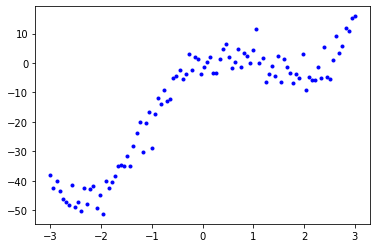

In [9]:
n = 100 # generating synthetic data with a sample size of n
x = np.linspace(-3, 3, n)
t = x ** 4 - 10 * x ** 2 + 10 * x + npr.normal(0, 4, x.shape[0]) # generating corresponding targets
plt.plot(x, t, 'b.') # plotting data points

[-0.28411622 10.11097804 -9.66841861 -0.09077891  0.94570934]


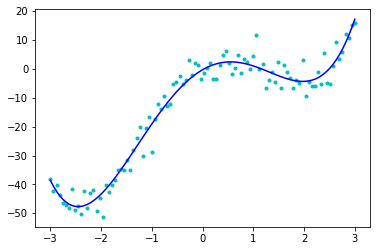

In [10]:
P = 4 # degree of polynomial to fit to the data (this is a hyperparameter)
feature_matrix = anp.array([[item ** i for i in range(P+1)] for item in x]) # Construct a feature matrix 
W = npr.randn(feature_matrix.shape[-1])

def cost(W):
    y = anp.dot(feature_matrix, W)
    return (1.0 / n) * anp.sum(0.5 * anp.square(y - t))

# Compute the gradient of the cost function using Autograd
cost_grad = grad(cost)

num_epochs = 10000
learning_rate = 0.001

for i in range(num_epochs): # manually implement gradient descent
    W = W - learning_rate * cost_grad(W)

print(W)

plt.plot(x, t, 'c.') # plotting the original training data again, together with the polynomial we fit
plt.plot(x, np.dot(feature_matrix, W), 'b-')

#### References:
   - Izen,an, A.J. (2008) Modern Multivariate Statistical Techniques: Regression, Classification, and Manifold Learning",New York: Springer. 
   - Hastie, T., Hastie, T., Tibshirani, R., & Friedman, J. H. (2001). The Elements of Statistical Learning: Data Mining, Inference, and Prediction. New York: Springer.
   - https://www.tensorflow.org/guide
   - https://cs231n.github.io/optimization-1/
   - https://cs231n.github.io/optimization-2/
   - http://www.cs.toronto.edu/~rgrosse/courses/csc321_2018/
   - https://pytorch.org/tutorials/beginner/blitz/autograd_tutorial.html
   - https://nbviewer.jupyter.org/url/www.cs.toronto.edu/~rgrosse/courses/csc321_2018/tutorials/tut4.ipynb
   - https://anaconda.org/conda-forge/autograd